<a href="https://colab.research.google.com/github/velurubhanuprasad144-boop/M516-Business-Project-in-Big-Data-AI-/blob/main/BD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading and Inspection**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Inspect the data
print("First 5 rows:\n", df.head())
print("Data info:\n")
df.info()
print("Missing values per column:\n", df.isnull().sum())



First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Missing values per column:
 age         0
sex         0
bmi         0

# **Data Cleaning.**

In [4]:
# Drop duplicates, if any
df = df.drop_duplicates()

# **Data Preprocessing**

In [5]:
# Encode 'sex' and 'smoker' columns to numeric values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode the 'region' column (and drop one region to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

print("Columns after encoding:\n", df.columns)
print(df.head())


Columns after encoding:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


# **Feature Engineering**

In [6]:
# Feature Engineering: Add 'smoker_bmi'
df['smoker_bmi'] = df['smoker'] * df['bmi']

# Feature & Target Split
X = df.drop('charges', axis=1)
y = df['charges']

print("Feature columns:\n", X.columns)
print("Target preview:\n", y.head())


Feature columns:
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest', 'smoker_bmi'],
      dtype='object')
Target preview:
 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


# ** Train-Test Split**

In [7]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1069, 9)
Test set size: (268, 9)


# **Feature Scaling**


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Sample of scaled training data:\n", X_train_scaled[:5])

Sample of scaled training data:
 [[-1.1576804  -0.97140947 -0.99692768 -0.90790804 -0.50029231 -0.57266946
  -0.60581158 -0.57410974 -0.48788264]
 [-1.30061876 -0.97140947 -0.79276204  0.7669042  -0.50029231 -0.57266946
  -0.60581158 -0.57410974 -0.48788264]
 [ 0.91492586  1.029432    1.15466402  0.7669042  -0.50029231  1.74620801
  -0.60581158 -0.57410974 -0.48788264]
 [ 1.70108686 -0.97140947  1.80683684 -0.90790804 -0.50029231 -0.57266946
   1.65067825 -0.57410974 -0.48788264]
 [ 0.55757996  1.029432   -0.6514166   0.7669042  -0.50029231 -0.57266946
  -0.60581158 -0.57410974 -0.48788264]]


# **Model Training — Gradient Boosting Regressor**

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

print("Model training completed.")


Model training completed.


I chose Gradient Boosting as the final model because it delivered the best test performance among the models evaluated. Specifically, it achieved the lowest Mean Absolute Error (MAE) (2445.27), the lowest Root Mean Squared Error (RMSE) (18,07,639), and the highest R² score (0.90). These results indicate that Gradient Boosting predicts insurance charges more accurately and explains the most variance in the data compared to Linear Regression and Random Forest. Therefore, it is the most reliable model for this regression task, balancing error minimization and predictive power.



results of the models thst has been tested


                         Model          MAE          RMSE        R2
                0  Linear Regression  2828.973747  2.091060e+07  0.886205
                1      Random Forest  2710.344503  2.279962e+07  0.875925
                2  Gradient Boosting  2445.269126  1.807639e+07  0.901628




# **Model Validation**

Gradient Boosting Test MAE: 2445.27
Gradient Boosting Test RMSE: 4251.63
Gradient Boosting Test R^2: 0.902


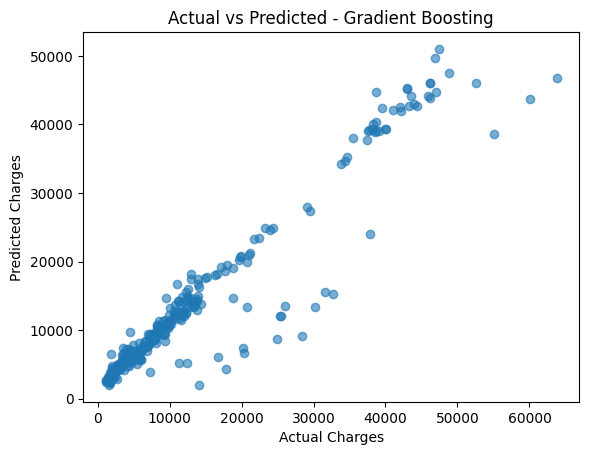

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict charges for the test set
y_pred_gb = gb.predict(X_test_scaled)

# Calculate metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5  # RMSE
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Test MAE: {mae_gb:.2f}")
print(f"Gradient Boosting Test RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting Test R^2: {r2_gb:.3f}")

# Optional: Visualize actual vs predicted
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Gradient Boosting")
plt.show()


# **Custom Prediction**

In [16]:
# Example input: change these values as desired
custom_input = {
    'age': 40,
    'sex': 1,           # 0 = male, 1 = female
    'bmi': 32.8,
    'children': 1,
    'smoker': 1,        # 0 = no, 1 = yes
    'region_northwest': 1,
    'region_southeast': 0,
    'region_southwest': 0,
    'smoker_bmi': 29.0  # smoker * bmi
}

# Convert to DataFrame with correct column order
custom_df = pd.DataFrame([custom_input])

# Same feature order as training data (adjust if your order is different)
custom_df = custom_df[X.columns]

# Scale custom input
custom_scaled = scaler.transform(custom_df)

# Predict
predicted_charge = gb.predict(custom_scaled)
print(f"Predicted insurance charge for input: {predicted_charge[0]:.2f}")


Predicted insurance charge for input: 26098.26
